In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Import des librairies**

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from fastai.vision import *
from fastai import *
import matplotlib.pyplot as plt             
import cv2
import seaborn as sns
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Flatten, MaxPool2D, ReLU
from keras.layers import Conv2D, BatchNormalization
from tqdm import tqdm
from sklearn.utils import shuffle
import matplotlib.image as mpimg
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Chargement des données**

In [2]:
# Liste des catégories d'images
class_names = ['bateau_slice', 'bol_slice', 'chat_slice', 'coeur_slice', 'cygne_slice', 'lapin_slice','maison_slice','marteau_slice','montagne_slice','pont_slice','renard_slice','tortue_slice']
# Dico des Labels
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
size = (150,150)
#Création d'une fonction load_data qui permet de générer les échantillons de Train et Test contenant les images 
#et leurs labels
def load_data():
    
    #Chemin d'accès aux datasets seg_train seg_test - A MODIFIER
    datasets = ['/content/drive/My Drive/image coupe/']
    output = []
    
    # Parcours des datasets
    for dataset in datasets:
        # Création de 2 listes images et labels
        # A COMPLETER
        folder = "../input/" + dataset
        images = []
        labels = []  
        
        # Parcours des sous-dossiers de chaque dossier 
        for folder in os.listdir(dataset):
            
            #Récupération du label (0, 1, 2,...) associé au sous-dossier folder à partir de class_names_label
            # A COMPLETER
            label = class_names_label[folder]
            
            # Parcours de chaque image dans chaque sous-dossier
            for file in tqdm((os.listdir(os.path.join(dataset, folder)))):
                
                # Récupération du chemin de l'image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Lecture de l'image avec Cv2
                # A COMPLETER

                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                

                # Ajout de image dans la listes images et labels
                # A COMPLETER
                images.append(curr_img)
                labels.append(label)    
                images, labels = shuffle(images, labels)
        # Conversion des listes images et labels en numpy.array
        # A COMPLETER
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
                
        # Ajout d'images et labels à la liste output
        output.append((images, labels))

    return output 

In [3]:
# Création de (train_images, train_labels), (test_images, test_labels) à partir de la fonction load_data()
# A COMPLETER
(x_train, y_train), (x_test, y_test) = load_data()

# Mélanger aléatoirement le dataset de train à l'aide de la fonction `shuffle()`
# A COMPLETER
x_train, y_train = shuffle(x_train, y_train)


100%|██████████| 6484/6484 [2:05:30<00:00,  1.16s/it]


ValueError: ignored

**Description et Traitement des données + Data Augumentation**

In [4]:
 Train = (x_train.shape, y_train.shape)
 Test = (x_test.shape, y_test.shape)
 print(Train, Test)

NameError: ignored

In [ ]:
x_train,y_train =train_test_split(x_train,y_train,test_size=.3)
x_

In [ ]:
y_train=to_categorical(y_train)

y_test=to_categorical(y_test)

In [ ]:
print((x_train.shape,y_train.shape))

print((x_test.shape,y_test.shape))

In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)



test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)

test_generator.fit(x_test)

**Entrainement du modèle et Analyse des performances**

In [ ]:
base_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (32,32,3), classes = y_train.shape[1])

In [ ]:
model= Sequential()
model.add(base_model) 
model.add(Flatten()) 
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))ense(128,activation=('relu')))
model.add(Dropout(.2))
model.add(Dense(10,activation=('softmax'))) 

# model summary
model.summary()

In [ ]:
batch_size= 100
epochs=50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit_generator(train_generator.flow(x_train, y_train, batch_siz e= batch_size),epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), validation_steps = 250, callbacks=[lrr], verbose = 1)


In [ ]:
plt.figure(figsize=(100,100))
for index, (image, label) in enumerate(zip(x_train[20:40],y_train[20:40])):
    plt.subplot(20, 40, index + 1)
    plt.imshow(image/255)
    plt.title('Training: %i\n' % label, fontsize = 20)
    plt.axis('off');
plt.show()

In [ ]:
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

In [ ]:
_, train_images = np.unique(y_train, return_counts=True)

In [ ]:
_, test_images = np.unique(y_test, return_counts=True)

In [ ]:
x_train = x_train/255
train = pd.DataFrame([x_train, y_train],index=['x_train', 'y_train']).T


In [ ]:
sns.barplot(_, train_images)

In [ ]:
sns.barplot(_, test_images)

**Image classification avec FastAI (ResNet34)**

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder('/content/drive/My Drive/image coupe/', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:262: UserWarning: There seems to be something wrong with your dataset, for example, in the first batch can't access these elements in self.train_ds: 5434
  warn(warn_msg)


In [ ]:
data.classes

['bateau_slice',
 'bol_slice',
 'chat_slice',
 'coeur_slice',
 'cygne_slice',
 'lapin_slice',
 'maison_slice',
 'marteau_slice',
 'montagne_slice',
 'pont_slice',
 'renard_slice',
 'tortue_slice']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

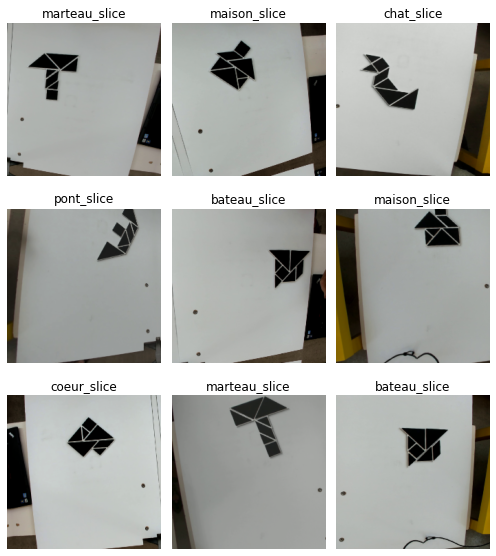

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bateau_slice',
  'bol_slice',
  'chat_slice',
  'coeur_slice',
  'cygne_slice',
  'lapin_slice',
  'maison_slice',
  'marteau_slice',
  'montagne_slice',
  'pont_slice',
  'renard_slice',
  'tortue_slice'],
 12,
 12366,
 3091)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

FileNotFoundError: ignored

In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
from fastai.widgets import *

In [ ]:
db = (ImageList.from_folder('/content/drive/My Drive/image coupe/')
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [ ]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [ ]:
ImageCleaner(ds, idxs, '/content/drive/My Drive/image coupe/')

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

In [ ]:
learn.export()

In [ ]:
defaults.device = torch.device('cpu')

In [ ]:
img = open_image('/content/drive/My Drive/image coupe/renard_slice/sliced_frame37523_01_01.png')
img

In [ ]:
learn = load_learner('/content/drive/My Drive/image coupe/')

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(1, max_lr=0.5)

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(5, max_lr=1e-5)

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [ ]:
learn.fit_one_cycle(1)

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder('/content/drive/My Drive/image coupe/', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))